# RKD Artists

## Number of female artists

In [20]:
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint = 'https://api.data.netwerkdigitaalerfgoed.nl/datasets/rkd/rkdartists/services/rkdartists-jena/sparql'
query = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rkdo: <http://data.rkd.nl/def#>
PREFIX schema: <http://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?id ?name ?gender ?date_birth ?date_death

WHERE {
?id a schema:Person .
?id schema:name ?name .
?id schema:gender ?gender .
?id rkdo:Birth ?birth .
OPTIONAL {
    ?birth schema:startDate ?date_birth . } .
?id rkdo:Death ?death .
OPTIONAL {
    ?death schema:startDate ?date_death . } .
    
FILTER ( ?date_birth >= "1800-01-01"^^xsd:date && ?date_birth < "1900-01-01"^^xsd:date)

}
ORDER BY ?name
"""


sparql = SPARQLWrapper(endpoint)
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
data = sparql.query().convert()


In [21]:
import pandas as pd
import numpy as np 

df = pd.json_normalize(data['results']['bindings'])   

print( f'There are {df.shape[0]} artists in this dataset.' )

## add column 'decade'
df['year'] = pd.DatetimeIndex(df['date_birth.value']).year
df['decade'] = df['year'] / 10
df['decade'] = np.floor(df['decade']).astype(int) * 10


female = df[ df['gender.value'] == 'http://schema.org/Female']
male = df[ df['gender.value'] == 'http://schema.org/Male']


print( f'There are {female.shape[0]} female artists and {male.shape[0]} male artists in this dataset.' )

counts = female.groupby('decade').size()
counts = counts.to_frame()


There are 31059 artists in this dataset.
There are 2951 female artists and 28105 male artists in this dataset.


In [22]:
for index,row in female.iterrows():
    print(row['name.value'])
    print(row['id.value'])

Louise (Queen of Denmark)
https://data.rkd.nl/artists/275368
Victoria (Queen of Great-Britain and Ireland)
https://data.rkd.nl/artists/80887
Wilhelmina (Queen of the Netherlands)
https://data.rkd.nl/artists/84533
Aafjes, Sijtje
https://data.rkd.nl/artists/15
Aagen Moro, Tai
https://data.rkd.nl/artists/126561
Aarem, Pauline van
https://data.rkd.nl/artists/58
Abbott, Berenice
https://data.rkd.nl/artists/124341
Abbéma, Louise
https://data.rkd.nl/artists/122
Abeleven, Henrica
https://data.rkd.nl/artists/112023
Abeloos, Sonia
https://data.rkd.nl/artists/184
Abels-d'Albert, Erika
https://data.rkd.nl/artists/341242
Abels-van Os, Cornelia Johanna
https://data.rkd.nl/artists/492508
Abrahams, Anna
https://data.rkd.nl/artists/227
Abresch, Annie
https://data.rkd.nl/artists/245
Achelis, Elisabeth
https://data.rkd.nl/artists/448366
Acheson Wallace, Lila
https://data.rkd.nl/artists/438828
Acheson, Alice
https://data.rkd.nl/artists/103253
Achille-Fould, Georges
https://data.rkd.nl/artists/109998
Adam,

Bergmann-Michel, Ella
https://data.rkd.nl/artists/7234
Bergöö, Karin
https://data.rkd.nl/artists/303066
Berlage, Anna Catherina
https://data.rkd.nl/artists/7381
Bernhardt, Sarah
https://data.rkd.nl/artists/209830
Bernstein, Anna
https://data.rkd.nl/artists/361873
Bernstein-Neuhaus, Martha
https://data.rkd.nl/artists/342099
Beroldingen, Maria von (Gräfin)
https://data.rkd.nl/artists/342103
Berrhagorry-Suair, Gabrielle
https://data.rkd.nl/artists/105027
Bertaux, Léon
https://data.rkd.nl/artists/209867
Berthoud, Blanche
https://data.rkd.nl/artists/125298
Bertoletti Marcelli, Pasquarosa
https://data.rkd.nl/artists/490086
Bertram-Conradi, Lis
https://data.rkd.nl/artists/342157
Berwerth, Laura Helmtraut
https://data.rkd.nl/artists/342159
Besier, Johanna Henriëtte
https://data.rkd.nl/artists/7725
Beskow, Elsa
https://data.rkd.nl/artists/301835
Besso, Amalia
https://data.rkd.nl/artists/7761
Beusekom, Johanna Nicoleta Jacoba van
https://data.rkd.nl/artists/297703
Bever de la Quintinie, Margueri

https://data.rkd.nl/artists/125415
Burkhardt, Martha
https://data.rkd.nl/artists/483765
Burlett, Anna Marguerite Jeanne Jacqueline de
https://data.rkd.nl/artists/14267
Burns, Margaret Delisle
https://data.rkd.nl/artists/14308
Bursztijn, Gudes
https://data.rkd.nl/artists/461944
Butler, Mildred Anne
https://data.rkd.nl/artists/14488
Buttgereit, Wilhelmine
https://data.rkd.nl/artists/344260
Buuren Martens, Johanna van
https://data.rkd.nl/artists/355303
Buuren-de Jonge, Johanna A. Catharina van
https://data.rkd.nl/artists/111319
Buys, Geertruida Maria
https://data.rkd.nl/artists/14556
Buyskes, Johanna Helena
https://data.rkd.nl/artists/14572
Bylandt, Marie Alexandrine Otheline Caroline van
https://data.rkd.nl/artists/363546
Böhl, Wilhelmina
https://data.rkd.nl/artists/9593
Böhtlingk, Henriette Anna Geertruida
https://data.rkd.nl/artists/414821
Böklen, Hilde
https://data.rkd.nl/artists/9631
Börjesson, Agnes
https://data.rkd.nl/artists/10796
Büchmann, Helene
https://data.rkd.nl/artists/34402

Dièz-Dürhkoop, Minya
https://data.rkd.nl/artists/376458
Dobbelaere, Clara
https://data.rkd.nl/artists/23367
Dobloff, Hertha Freifrau von
https://data.rkd.nl/artists/345166
Dodge, Francis Farrand
https://data.rkd.nl/artists/23428
Dods-Withers, Isobella Ann
https://data.rkd.nl/artists/134883
Doebrova, Valentina
https://data.rkd.nl/artists/103124
Does de Willebois, Sophia van der
https://data.rkd.nl/artists/23466
Does, Elisabeth Wilhelmina van der
https://data.rkd.nl/artists/23469
Doesburg, Nelly van
https://data.rkd.nl/artists/367971
Doffegnies, Thomasine Adrienne
https://data.rkd.nl/artists/88537
Dohlmann, Augusta
https://data.rkd.nl/artists/271003
Dolleman, Sophie
https://data.rkd.nl/artists/365440
Dolleman-Thierry de Bye, Henriette Louise
https://data.rkd.nl/artists/414177
Dollschein, Anny
https://data.rkd.nl/artists/345201
Domizlaff, Hildegard
https://data.rkd.nl/artists/268608
Donas, Marthe
https://data.rkd.nl/artists/23662
Donk, Helena Christina
https://data.rkd.nl/artists/462674
D

Gilpin, Laura
https://data.rkd.nl/artists/375964
Ginzkey, Hermine
https://data.rkd.nl/artists/347892
Girard-Rabache, Hélène
https://data.rkd.nl/artists/131291
Girl, Helisena
https://data.rkd.nl/artists/347910
Glatz, Maria
https://data.rkd.nl/artists/124250
Gleichen, Feddora von Gleichen
https://data.rkd.nl/artists/424385
Glitsch, Irmgard
https://data.rkd.nl/artists/127347
Gloag, Isobel Lilian
https://data.rkd.nl/artists/32143
Gluck
https://data.rkd.nl/artists/32168
Gockinga, Cordula
https://data.rkd.nl/artists/92903
Goddard, Lizzy
https://data.rkd.nl/artists/32227
Godefroij, Wilhelmina Jacoba
https://data.rkd.nl/artists/366354
Godin, Jeanne Wilhelmina Catharine
https://data.rkd.nl/artists/32265
Goebeler, Elise
https://data.rkd.nl/artists/32285
Goedewaagen, Nelly
https://data.rkd.nl/artists/32307
Goedkoop, Mathilda Geertruida
https://data.rkd.nl/artists/421553
Goemans, Maria Johanna
https://data.rkd.nl/artists/366375
Goes van Dirxland, Marie Adolphine van der
https://data.rkd.nl/artists

https://data.rkd.nl/artists/367187
Hasselt, Emmerentia Christina van
https://data.rkd.nl/artists/36412
Hasselt, Johanna van
https://data.rkd.nl/artists/421579
Hasselt, Margot van
https://data.rkd.nl/artists/111398
Hattem, Jacoba Charlotte Johanna van
https://data.rkd.nl/artists/421563
Hatterman, Nola
https://data.rkd.nl/artists/36444
Hattink, Elisabeth
https://data.rkd.nl/artists/111409
Hauge, Marie
https://data.rkd.nl/artists/463647
Hauptmann, Eugenie
https://data.rkd.nl/artists/36488
Hautot, Rachel Lucy
https://data.rkd.nl/artists/211648
Hauttmann, Minna
https://data.rkd.nl/artists/244055
Havemeyer, Louisine
https://data.rkd.nl/artists/453769
Haverman-Birnie, Carolina
https://data.rkd.nl/artists/36578
Havlena, Julia
https://data.rkd.nl/artists/349097
Hawarden, Clementina
https://data.rkd.nl/artists/254111
Hawkins-Whitshed, Elizabeth Sophia
https://data.rkd.nl/artists/307629
Hayllar, Jessica
https://data.rkd.nl/artists/36669
Hazelenkamp, Maria van der
https://data.rkd.nl/artists/46341

Horn-Zippelius, Dora
https://data.rkd.nl/artists/350148
Horovitz, Dora
https://data.rkd.nl/artists/395304
Horst, Gerarda van der
https://data.rkd.nl/artists/367987
Horst-Zilcken, Renée Hélène Laure
https://data.rkd.nl/artists/110344
Horstman, Alida Wilhelmina Margaretha
https://data.rkd.nl/artists/367989
Hoschedé-Monet, Blanche
https://data.rkd.nl/artists/39897
Hosmer, Harriet
https://data.rkd.nl/artists/121636
Houston, Frances C.
https://data.rkd.nl/artists/87002
Houten, Alida van
https://data.rkd.nl/artists/88391
Houten, Anna van (1846-1899)
https://data.rkd.nl/artists/368002
Houten, Barbara Elisabeth van
https://data.rkd.nl/artists/40025
Houten, Lydie van
https://data.rkd.nl/artists/111578
Houten-Edwards, Anna van
https://data.rkd.nl/artists/40027
Houtum, Josephine van
https://data.rkd.nl/artists/414263
Houweninge, Adriana Diderika van
https://data.rkd.nl/artists/111557
Hove, Henriëtte van
https://data.rkd.nl/artists/90069
Hove, Maria Arnoldina van
https://data.rkd.nl/artists/110434

https://data.rkd.nl/artists/106122
Kiseleva, Elena Andreevna
https://data.rkd.nl/artists/211662
Kissel, Eleonora
https://data.rkd.nl/artists/106123
Kist, Wilhelmine
https://data.rkd.nl/artists/90416
Kjellberg-Juel, Astrid
https://data.rkd.nl/artists/464035
Kjerner, Esther
https://data.rkd.nl/artists/44553
Kleber, Annie
https://data.rkd.nl/artists/90432
Klebusch, Hermine Auguste
https://data.rkd.nl/artists/463964
Kleeff, Johanna van
https://data.rkd.nl/artists/90430
Kleen, Tyra af
https://data.rkd.nl/artists/44635
Klees, Catharine
https://data.rkd.nl/artists/90438
Klein, Anna
https://data.rkd.nl/artists/222331
Kleine, Anna Josephina
https://data.rkd.nl/artists/44709
Kleintjes-van Osselen, Hedwig
https://data.rkd.nl/artists/89518
Klemm-Jäger, Hedwig
https://data.rkd.nl/artists/222387
Kleynhens, Helena Elisabeth
https://data.rkd.nl/artists/371435
Klint, Hilma af
https://data.rkd.nl/artists/253481
Klitgaard, Georgina
https://data.rkd.nl/artists/87430
Klok, Annie
https://data.rkd.nl/artists

Levy, Beatrice S.
https://data.rkd.nl/artists/87871
Lewi, Minna
https://data.rkd.nl/artists/353016
Lewin, Antonie
https://data.rkd.nl/artists/88939
Lex-Nerlinger, Alice
https://data.rkd.nl/artists/305136
Ley, Sophie
https://data.rkd.nl/artists/225638
Leyen, Helene von der
https://data.rkd.nl/artists/225648
Lidow
https://data.rkd.nl/artists/99058
Lieftinck, Elisabeth
https://data.rkd.nl/artists/421559
Lieftinck, Jo
https://data.rkd.nl/artists/372460
Lienard, Emile Désiré
https://data.rkd.nl/artists/49961
Liernur, Maria Elisabeth
https://data.rkd.nl/artists/49977
Liessner-Blomberg, Elena
https://data.rkd.nl/artists/257686
Limburg Stirum, Caro van
https://data.rkd.nl/artists/88947
Linck, Margrit
https://data.rkd.nl/artists/254324
Lind, Marie Magdalena
https://data.rkd.nl/artists/421474
Lindegren, Amalia
https://data.rkd.nl/artists/50118
Lindemann, Hedwig
https://data.rkd.nl/artists/353125
Linden-Tels, Annie S. van der
https://data.rkd.nl/artists/76749
Lindo, Harriet
https://data.rkd.nl/ar

https://data.rkd.nl/artists/335950
Rambonnet, Simonia Françoise
https://data.rkd.nl/artists/373344
Rambonnet-Daponte, Anita
https://data.rkd.nl/artists/116995
Ranitz, Cecilia Maria Elisabeth de
https://data.rkd.nl/artists/65596
Ranitz, Lita de
https://data.rkd.nl/artists/344705
Raphael Hallencreutz, Olga
https://data.rkd.nl/artists/466205
Rapmund-Stapelveld, Louise
https://data.rkd.nl/artists/109365
Rappard, Clara von
https://data.rkd.nl/artists/126429
Rappard, M.C.
https://data.rkd.nl/artists/89804
Rappard, Maria van
https://data.rkd.nl/artists/366770
Rappard-Broese van Groenou, Elsje
https://data.rkd.nl/artists/122471
Rasch, Maria
https://data.rkd.nl/artists/432439
Rathsman, Siri
https://data.rkd.nl/artists/466214
Rauws, Clara
https://data.rkd.nl/artists/110861
Ravenswaaij, Marie
https://data.rkd.nl/artists/89807
Ravenswaay, Adriana van
https://data.rkd.nl/artists/65749
Rebay, Hilla
https://data.rkd.nl/artists/65836
Redpath, Anne
https://data.rkd.nl/artists/65893
Reece, Jane
https://

Santen, Hans van
https://data.rkd.nl/artists/69695
Santen-Bulk, Babje Jeanette van
https://data.rkd.nl/artists/69689
Sargent, Margareth W.
https://data.rkd.nl/artists/97251
Sassen, Louise
https://data.rkd.nl/artists/69816
Sassen, Maria Jacoba Josephina
https://data.rkd.nl/artists/373660
Sauerbier, Hermina Geertruida
https://data.rkd.nl/artists/108821
Sauerbier, Maria Adriana
https://data.rkd.nl/artists/108822
Saunders, Helen
https://data.rkd.nl/artists/69854
Saurel, Pauline Theresia
https://data.rkd.nl/artists/465414
Savrij, Cornelia Johanna
https://data.rkd.nl/artists/108857
Saxlund, Edle Alma-
https://data.rkd.nl/artists/131669
Schachner, Therese
https://data.rkd.nl/artists/70059
Schaik-Russell, Adeline Maud van
https://data.rkd.nl/artists/70137
Schakel, Marianna Christina
https://data.rkd.nl/artists/108826
Schalek, Alice
https://data.rkd.nl/artists/325703
Schalek, Malva
https://data.rkd.nl/artists/230381
Schalk, Ada van der
https://data.rkd.nl/artists/104744
Schalk-Kimmijser, M.M.A.

https://data.rkd.nl/artists/75794
Stroobant, A.
https://data.rkd.nl/artists/75805
Struben, Jeannette Francoise
https://data.rkd.nl/artists/421414
Struick du Moulin, Dora
https://data.rkd.nl/artists/75837
Strumphler, Sara Johanna
https://data.rkd.nl/artists/109410
Strzygowski, Hertha
https://data.rkd.nl/artists/296324
Strömberg, Julia Charlotte Mortana
https://data.rkd.nl/artists/276251
Strøm, Gerda
https://data.rkd.nl/artists/75790
Sturel, Octavie Marie
https://data.rkd.nl/artists/485994
Sturler de Frienisberg, Hilda de
https://data.rkd.nl/artists/364033
Stuten, Charlotte
https://data.rkd.nl/artists/374534
Stöckel, Johanna
https://data.rkd.nl/artists/359531
Stöckhardt, Clara Henriette Marie
https://data.rkd.nl/artists/359558
Stöhr, Emma
https://data.rkd.nl/artists/359637
Stölzl, Gunta
https://data.rkd.nl/artists/253287
Störck, Hedwig Marcella
https://data.rkd.nl/artists/359742
Stüler-Walde, Marie
https://data.rkd.nl/artists/232754
Stünckel, Emmy
https://data.rkd.nl/artists/465724
Suij,

Weel, Wilhelmina
https://data.rkd.nl/artists/466016
Weel-Kuijpers, Anna Maria
https://data.rkd.nl/artists/466017
Wefers Bettink, Anna Geertruida
https://data.rkd.nl/artists/83295
Weg, Jeanne Sophia van de
https://data.rkd.nl/artists/417478
Wegener, Gerda
https://data.rkd.nl/artists/83299
Wegerif-Gravestein, Agathe
https://data.rkd.nl/artists/33449
Wegman, Anna Maria
https://data.rkd.nl/artists/91921
Wegmann, Bertha
https://data.rkd.nl/artists/83308
Weichberger-Kloss, Susanne
https://data.rkd.nl/artists/361474
Weiler, Dorothea Arnoldine von
https://data.rkd.nl/artists/110208
Weinrich, Agnes
https://data.rkd.nl/artists/102804
Weise, Elsa
https://data.rkd.nl/artists/233825
Weisl, Friederike
https://data.rkd.nl/artists/361564
Weiss, Charlotte
https://data.rkd.nl/artists/126836
Weiss, Hedwig
https://data.rkd.nl/artists/337719
Weiss, Olga
https://data.rkd.nl/artists/233842
Weissenborn, Else
https://data.rkd.nl/artists/417867
Weissenborn, Thilly
https://data.rkd.nl/artists/384425
Weissenstein

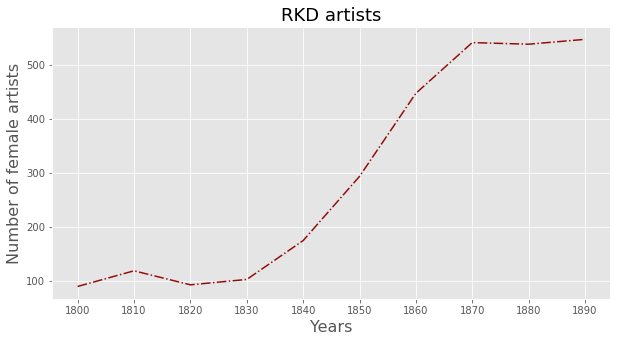

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig = plt.figure( figsize = ( 10, 5))
ax = plt.axes()

ax.plot( counts.index , counts.values , color = '#930d08' , linestyle = 'dashdot')

ax.set_xlabel('Years', size = 16)
ax.set_ylabel('Number of female artists', size = 16 )


ax.set_title( 'RKD artists', size = 18)
plt.xticks(counts.index)

plt.show()

## Data for Piet Mondriaan

In [24]:
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint = 'https://api.data.netwerkdigitaalerfgoed.nl/datasets/rkd/rkdartists/services/rkdartists-jena/sparql'
query = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rkdo: <http://data.rkd.nl/def#>
PREFIX schema: <http://schema.org/>
prefix wd: <http://www.wikidata.org/entity/>
prefix wdt: <http://www.wikidata.org/prop/direct/>

SELECT ?name ?gender ?nationality ?id ?add ?alternate ?pob ?birth_date 
?pod ?death_date ?edu_name  ?title ?image ?event ?event_desc ?event_location ?event_lat  ?event_long  ?event_date 

WHERE {

?artist schema:identifier '56854' .
?artist schema:name ?name .
OPTIONAL { ?artist schema:gender ?gender . } .
OPTIONAL { ?artist schema:nationality ?nationality . } .
OPTIONAL { ?artist schema:identifier ?id . } .
OPTIONAL { ?artist schema:additionalType ?add . } .
OPTIONAL { ?artist schema:alternateName ?alternate . } .

?artist rkdo:Birth ?birth .
OPTIONAL { ?birth schema:location ?pob . } .
OPTIONAL { ?birth schema:startDate ?birth_date  . } .

  
?artist rkdo:Death ?death .
OPTIONAL { ?death schema:location ?pod . } .
OPTIONAL { ?death schema:startDate ?death_date . } .
  
?artist rkdo:Education ?edu .
OPTIONAL { ?edu schema:name ?edu_name. } .
  
?artist schema:event ?event.
OPTIONAL { ?event schema:description ?event_desc . } .
OPTIONAL { ?event schema:location ?event_location . } .
OPTIONAL { ?event schema:latitude ?event_lat . } .
OPTIONAL { ?event schema:longitude ?event_long . } .
OPTIONAL { ?event schema:startDate ?event_date .} .

service <https://query.wikidata.org/bigdata/namespace/wdq/sparql> {

?work wdt:P31 wd:Q3305213;
    wdt:P170 wd:Q151803;
    wdt:P18 ?image;
    wdt:P1476 ?title;
}
  
FILTER (lang(?name) = 'nl')
}

"""


sparql = SPARQLWrapper(endpoint)
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
data = sparql.query().convert()


In [25]:
import pandas as pd
import numpy as np 

df = pd.json_normalize(data['results']['bindings'])   

In [33]:
from IPython.core.display import display, HTML


first = df.iloc[0]
print( f"Name: {first['name.value']}" )
print( f"https://rkd.nl/nl/explore/artists/{first['id.value']}" )

print( f"\nGender: {first['gender.value'][first['gender.value'].rindex('/')+1:]}" )
print( f"Date of birth: {first['birth_date.value']}" )
print( f"Date of death: {first['death_date.value']}" )

print('\nAlternative names:')
names = df['alternate.value']
for name in names.drop_duplicates().values:
    print(name)
    
print('\nEducation:')
edu = df['edu_name.value']
for education in edu.drop_duplicates().values:
    print(education)
    

print('\nEvents:')
df['event_duplicated'] = df.duplicated(subset='event_desc.value', keep='first')

events = df[ df['event_duplicated'] == False ]
events = events.sort_values('event_date.value')
for i,row in events.iterrows():
    print( f"{row['event_date.value']}\n{row['event_desc.value']} ")
    

print('\nWorks:')
df['works_duplicated'] = df.duplicated(subset='title.value', keep='first')

works = df[ df['works_duplicated'] == False ]
for i,row in works.iterrows():
    print( f"{row['title.value']}\n")
    display(HTML(f'<img src="{row["image.value"]}" style="width: 200px; " />'))


    

Name: Mondriaan, Piet
https://rkd.nl/nl/explore/artists/56854

Gender: Male
Date of birth: 1872-03-07
Date of death: 1944-02-01

Alternative names:
Mondrian, Piet
Mondriaan, Pieter Cornelis

Education:
Rijksakademie van beeldende kunsten (Amsterdam)

Events:
1909
also West-Kapelle 
1911
visits Paris for ten days in mid-June (Bois 1994) 
1912-03
lives at avenue du Maine 33 (Bois 1994) 
1912-05
lives at rue du Départ 26 (Bois 1994) 
1919-06-22
due to finding his old studio at 26 rue du Départ occupied by Tour Dones, moves into the vacant studio Kickert had occupied briefly in 1912 in the same building (Bois 1994) 
1919-11-01
moves to a new studio at rue de Coulmiers 5 (Bois 1994) 
1921-10-22
returns to rue du Départ, where he occupies the larger studio of the Stieltjes (Bois 1994) 
1936-03-20
moves into new quarters in the studio building at boulevard Raspail 278 (Bois 1994) 
1938
nan 

Works:
Composition II ; Composition 2 avec rouge et bleu



Composition en rouge, bleu et blanc II



Still Life with Sunflower



Stammer Mill with Streaked Sky



Composition with Red, Blue, Yellow, Black, and Gray



Victory Boogie Woogie



Molen aan 't Gein



Broadway Boogie Woogie



De rode boom



De grijze boom



Tableau I (Schilderij I)



Composition with Yellow, Blue and Red



Oostzijdse Mill along the River Gein by Moonlight



Oostzijdse molen aan het Gein bij maanlicht



Composition: No. III, with Red, Yellow, and Blue



Compositie: no. III, met rood, geel en blauw



Apple Tree, Pointillist Version



Composition with Large Blue Plane, Red, Black, Yellow, and Gray



Windmill



Farm Near Duivendrecht, in the Evening



Vuurtoren bij Westkapelle



Evolutie



Stilleven met gemberpot 2



Molen; Molen bij zonlicht



Molen bij Domburg



Molen; De rode molen



Bomen aan het Gein: opkomende maan



Devotie



Bosch; Bos bij Oele



Kerk te Domburg



Zeeuwsche kerktoren



Metamorfose



Lozenge Composition with Yellow, Black, Blue, Red, and Gray



Windmolen



Zelfportret



Rastercompositie 9: dambordcompositie heldere kleuren



Duin III



Zomer, duin in Zeeland



Stilleven met gemberpot 1



Windmill with Summerhouse II



Oostzijdse molen in maanlicht



Composition



Tableau No. IV; Lozenge Composition with Red, Gray, Blue, Yellow, and Black



Farm near Duivendrecht



Composition (No. 1) Gray-Red



Composition with Blue, Yellow, and Red



grande composizione A con nero, rosso, grigio, giallo e blu



Geschoten haas



Zwartbonte vaars in de weide



Bloeiende appelboom



Apple Tree in Bloom



Boerderij met wasgoed aan de lijn



Chrysanthemum



Rastercompositie 8: dambordcompositie donkere kleuren



Composition No. IV (Compositie No. IV) / Compositie 6



Compositie bomen 2



Composition de lignes et couleur: III (Compositie met lijnen en met kleur: III)



Duin I



Boerderij met hooiberg



Compositie met grijze lijnen



Kindje



Zee na zonsondergang



Spring Sun (Lentezon): Castle Ruin: Brederode



Tableau III: Composition in Oval



Tableau III: compositie in ovaal



Oostzijdse molen bij avond



Arbre



The Tree A



The Winkel Mill, Pointillist Version



Willow Grove: Impression of Light and Shadow



Wilgen met zon (studie olieverf)



Koeien in de wei



Landschap bij maanlicht



Ven bij Saasveld



Korenschoven in het veld



Boerderij bij Duivendrecht



Boerderij in de avond



Isar Harlemia



Veld met bomen bij avond



Het Singel, Amsterdam



Onderschildering voor land en lucht



Boerderij te Blaricum



Werf te Durgerdam



Bomen langs het Gein



Avondstemming aan de Amstel (De Omval)



Vrouw bij boerderij



Onderschildering voor avondlandschap



Veld met bomengroep bij avond II



Schaapskooi in de avond



Veld met bomengroep bij avond I



Boerderij Geinrust in de nevel



Stervende zonnebloem I



Stervende zonnebloem II



Zeegezicht



Duin II



Aäronskelk; Blauwe bloem



Aäronskelken



Zeeuwsche boer



Kerk te Oostkapelle



Duinlandschap



Paysage (Landschap)



Landschap met bomen



Portret van een dame



Het grote naakt



Compositie bomen 1



Tableau No. 4 (Schilderij No. 4) / Composition No.VIII / Compositie 3



Compositie in ovaal met kleurvlakken 2



Molen bij avond



Stier



Gezicht op een rij huizen met een landweg



Sloot met brug



Knotwilgen



Boom



Twee aronskelken



Compositie met rood, blauw, zwart, geel en grijs



Boerderij



Kopie naar de Pietà van Villeneuve-Lès-Avignon door Enguerrand Quarton



Oostzijdse molen



Boerderij Landzicht



Duinen bij Domburg



Compositie met rood, zwart, geel, blauw en grijs



Huisje bij zon



De rode wolk



Slootje bij boerderij Landzicht



Avond aan het Gein



Portret van D.J. Hulshoff Pol



Portret van J.P.G. Hulshoff Pol



Avondlandschap



Boerderij met boerin aan de was



Knotwilgenbosje langs het Gein



Eenzame boom aan het Gein



Compositie no. 3 met kleurvakjes



Boerderij aan een sloot met bomen



Compositie met gele lijnen



Boomgaard met kippen



Groot landschap



Avondlandschap aan het Gein



Landschap met bomen aan het Gein



Molen achter hoge bomen



Gezicht op de Schinkelbuurt



Het Gein: Bomen aan het water



Duin IV



Compositie met rood, geel, zwart, blauw en grijs



Boerderij met bomen



Weidelandschap met koeien



Boerderij, Brabant



Dorpsgezicht



Avond



De Kostverlorenvaart



Twee chrysanten



Wilgen aan het Gein



Baggermolen



Weide met koeien



Bos



Bloeiende bomen



Landweg met huizen



Studie naar twee koeien



Mijmering



Roodbonte vaars in de weide



Twee figuren



Vrouwen met kind voor boerderij



Sloot met twee wilgen



Boerenhoeve aan een sloot



Bij de ossenstal



Schuur te Nistelrode



Het Gein: bomen aan het water



Boerderijen met op de voorgrond een hek



Huis aan het water met vrouw aan de was



Avondlandschap met koeien



De Koninklijke Waskaarsenfabriek



De Boerenwetering



Boerderij met wilgen aan het Gein



Bleekerij aan het Gein



Boerderij tussen eikenbomen



Wilgenbosje



Tableau No. 3: Composition in Oval



Tableau no. 3: compositie in ovaal



Stilleven met haringen



Still Life with Herrings



Painting No. II / Composition No. XV / Composition 4



Schilderij no. II / Compositie no. XV / Compositie 4



Composition with Yellow, Red, Black, Blue, and Gray



Compositie met geel, rood, zwart, blauw en grijs



Composition No.IV, with Red, Blue, and Yellow



Compositie no. IV, met rood, blauw en geel



Farm Setting, Four Tall Trees in the Foreground I



Boerderij met vier hoge bomen in de voorgrond I



Lozenge Composition with Two Lines



Ruitvormige compositie met twee lijnen



Mannelijk naakt



Sun, Church in Zeeland; Zoutelande Church Facade



Composition B (No.II) with Red



No. VI / Composition No.II



Fox Trot B, with Black, Red, Blue, and Yellow



Fox Trot A



By the Sea

